In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import plotly.graph_objs as go
# from chart_studio.plotly import plot, iplot
# import cufflinks as cf
# cf.go_offline(connected=True)

In [3]:
return_df = pd.read_csv('../data/kospi/preprocessed/df_return.csv',index_col=0)*100 #%단위로 환산
jaccard_df = pd.read_csv('../data/similarity/jaccard_df.csv',index_col=0)
cosine_df = pd.read_csv('../data/similarity/cosine_df.csv',index_col=0)

lv2_jaccard = jaccard_df.copy().loc[return_df.index] #거래일에 맞춰서 인덱싱
lv2_cosine = cosine_df.copy().loc[return_df.index]

## Main table II 구성

Excess return, 3-factor alpha, 5-factor alpha 을 계산한 table II 를 만들고자 합니다.
유사도 기준으로 Q1~Q5까지 낮은순부터 높은 순대로 portfolio를 만들고 document가 filing된 시점부터 종목을 보유하여 3개월 동안의 수익률을 보겠습니다. 그룹을 sorting하는 데 있어서는 전체유사도 평균이 아닌 개별기업의 연속된 사업보고서 값을 선정하였습니다.

Quantile 1(Q1) refers to firms that have the least similarity between their document this year and
the one last year; hence this portfolio consists of the “big changers.” Quintile 5 (Q5) refers
to firms that have the most similarity in their documents across years, and hence this
portfolio represents the “little to no changers.

In [4]:
lv2_jaccard[lv2_jaccard.loc[:,'삼양홀딩스'] > 0]

,삼양홀딩스,유한양행,CJ대한통운,두산,대림산업,한국테크놀로지그룹,기아차,동아쏘시오홀딩스,SK하이닉스,영풍,...,현대백화점,한국금융지주,GS,하나금융지주,아모레퍼시픽,LF,후성,SK이노베이션,CJ제일제당,KB금융
20110331,0.482558,NaN,0.615385,0.579749,0.630503,0.203113,0.705706,NaN,0.596091,0.576200,...,0.873362,NaN,NaN,0.462889,0.577154,NaN,0.633452,0.574394,0.755193,0.716630
20120330,0.349498,0.691877,0.500778,0.484272,0.604478,0.650970,0.404380,0.446479,0.344828,0.372517,...,NaN,NaN,0.692913,0.649770,0.555950,0.895184,0.592593,0.425806,0.579278,0.710660
20130401,0.541254,NaN,NaN,NaN,0.714286,0.597826,0.536538,0.645907,NaN,0.525890,...,0.725910,NaN,NaN,0.643997,0.551537,NaN,0.533141,0.571237,0.730924,NaN
20140331,0.623506,0.576659,0.528402,0.468793,0.643312,0.898990,0.697959,0.668571,0.452794,0.510526,...,0.763092,0.471028,0.881773,0.776367,0.604414,0.650526,0.604839,0.543253,0.754881,0.737799
20150331,0.688259,0.782927,0.616085,0.589710,0.665848,0.924460,0.677355,0.529118,0.324324,0.812367,...,0.640756,0.772939,0.130774,0.678119,0.518400,0.923913,0.818681,0.672179,0.678571,0.724490
20160330,0.632207,0.574423,0.579921,0.591931,0.571914,0.933852,0.791111,0.674319,0.317259,0.782341,...,0.726695,0.566667,0.724882,0.677509,0.487842,0.785276,0.794721,0.652893,0.599624,0.781513
20170331,0.643299,0.816705,0.541444,0.597531,0.629448,0.604712,0.692469,0.867362,0.585882,0.680357,...,0.729977,0.629002,0.743371,0.703704,0.556535,NaN,0.890244,0.864389,0.637708,0.701692
20180402,0.540034,0.715789,0.599490,NaN,NaN,0.739583,0.646035,0.815789,0.321534,0.839187,...,0.652427,0.507442,0.578341,0.780149,0.638095,NaN,0.828804,0.739049,NaN,0.753463
20190401,0.690635,0.532609,0.727488,NaN,0.510638,0.625402,0.678700,0.738854,NaN,0.811252,...,0.758364,0.564672,0.671296,0.776720,0.543662,0.870103,0.857909,0.810392,0.677365,0.821839


In [5]:
return_df.head(10)

,삼양홀딩스,유한양행,CJ대한통운,두산,대림산업,한국테크놀로지그룹,기아차,동아쏘시오홀딩스,SK하이닉스,영풍,...,현대백화점,한국금융지주,GS,하나금융지주,아모레퍼시픽,LF,후성,SK이노베이션,CJ제일제당,KB금융
20100104,0.449157,-1.122864,-3.880071,-2.620941,2.524038,-1.758137,3.740648,3.891752,4.103672,0.000000,...,0.444444,2.238806,-0.147929,1.367781,0.856311,1.109350,-0.666489,-0.425532,0.729927,-0.502513
20100105,-0.558935,0.568162,-0.183486,-0.215587,-0.937866,-4.393390,-5.528846,-3.371371,-3.112033,-3.339192,...,-4.424779,1.021898,0.444444,1.649175,-2.865512,-3.918495,-0.644122,3.846154,6.280193,-1.178451
20100106,-0.784746,1.129200,3.676471,5.501953,2.011834,-0.623946,1.017812,-2.712609,5.139186,-2.363636,...,-2.314815,-0.867052,1.032448,0.000000,-6.011538,-0.815661,1.431659,0.411523,0.227273,-0.340716
20100107,-1.584085,-0.838313,0.354610,2.761419,-0.232019,-2.528424,-4.534005,0.796951,-0.610998,-0.372439,...,0.473934,-2.040816,1.021898,-1.327434,-2.208737,-0.822368,0.798935,-0.409836,-1.133787,-1.196581
20100108,-0.230257,-0.843997,1.766784,6.467385,1.046512,0.870474,2.110818,-0.790650,1.024590,-0.373832,...,-2.358491,6.696429,-0.433526,0.298954,-1.546563,0.995025,0.501982,0.823045,0.000000,0.173010
20100111,0.230788,-1.705193,3.125000,-1.402081,3.452244,-1.070072,-3.100775,-3.187805,-2.636917,-0.562852,...,0.000000,-0.697350,1.015965,6.706408,3.019766,-1.970443,4.258675,0.816327,-0.917431,2.072539
20100112,-0.230257,-2.023423,-1.683502,4.740063,4.449388,-0.218074,1.066667,0.000000,0.208333,-0.377358,...,1.932367,-1.123596,-2.011494,-0.139665,-1.406437,0.502513,-1.109430,0.000000,0.925926,-0.507614
20100113,-1.267115,-1.179911,-2.910959,-2.262775,-0.745474,-4.108751,0.263852,-3.291650,0.000000,-1.325758,...,-2.843602,-2.982955,1.466276,-0.139860,-0.237750,-1.500000,0.994391,-4.453441,-3.211009,-1.870748
20100114,-0.815877,-0.595512,2.116402,-0.926065,1.180258,-0.455830,0.526316,-1.276818,5.821206,0.000000,...,0.487805,2.342606,2.745665,-0.280112,-0.476633,1.522843,-1.363292,0.847458,3.791469,-0.519931
20100115,0.115570,0.898994,-0.172712,5.607162,-0.742312,-0.228959,0.000000,-0.431110,2.554028,-0.383877,...,-0.485437,-2.432046,5.485232,-0.842697,-2.635234,3.000000,0.998208,-0.420168,2.283105,-0.174216


In [6]:
jaccard_df.min()

삼양홀딩스        0.349498
유한양행         0.532609
CJ대한통운       0.466586
두산           0.468793
대림산업         0.505664
한국테크놀로지그룹    0.203113
기아차          0.404380
동아쏘시오홀딩스     0.446479
SK하이닉스       0.317259
영풍           0.372517
현대건설         0.340672
삼성화재         0.639655
한화           0.420606
CJ           0.133525
LG상사         0.452421
동국제강         0.323043
세아베스틸        0.300000
대상           0.576375
SK네트웍스       0.488281
오리온홀딩스       0.507246
고려제강         0.276198
롯데푸드         0.455674
넥센타이어        0.488263
KCC          0.554033
아모레G         0.349291
부광약품         0.506679
태광산업         0.508287
쌍용양회         0.507736
대한항공         0.267813
LG           0.437102
               ...   
삼성카드         0.617702
제일기획         0.636049
KT           0.216774
KT&G         0.301196
두산중공업        0.473504
LG디스플레이      0.278571
강원랜드         0.570850
NAVER        0.450689
한국가스공사       0.293886
엔씨소프트        0.392857
두산인프라코어      0.416350
대우건설         0.454798
포스코인터내셔널     0.441199
LG생활건강       0.302540
LG화학      

In [7]:
a = jaccard_df.min()
for idx,i in enumerate(a):
    if i == a.min():
        print(idx,i)
    

105 0.13077423552374756


In [8]:
b = jaccard_df.max()

In [9]:
for idx,i in enumerate(b):
    if i == b.max():
        print(idx,i)

80 1.0


In [10]:
jaccard_df.columns[80]

'한국단자'

In [ ]:
jaccard_df.iloc[:,80]

In [ ]:
jaccard_df.columns[105]

In [ ]:
jaccard_df.columns[112]

In [ ]:
jaccard_df.iloc[:,105].max()

In [11]:
val_idx,val_col = np.where(np.isfinite(jaccard_df))
container = np.full(shape=len(val_idx),fill_value=np.nan)

In [12]:
def get_after_filing_return(df,windows=30) : #기업 columns와 rcp_index 토대로 누적수익률 (sim_type 상관없음)
    
    val_idx,val_col = np.where(np.isfinite(df)) 
    container = np.full(shape=(len(val_idx),windows),fill_value=np.nan)
    idx_ls = []
    for num,(idx,col) in enumerate(zip(val_idx,val_col)) : 
        tmp = return_df.iloc[idx:idx+windows,col].values
        if windows - len(tmp) > 0 : 
            tmp = np.array(tmp.tolist()+[np.nan]*(windows-len(tmp)))
        container[num] = tmp #한기업의 filing이후 window_size만큼의 수익률 저장
        
        tmp_idx = return_df.index[idx]
        tmp_col = return_df.columns[col]        
        idx_ls.append("{}_{}".format(tmp_col,tmp_idx))
    
    final_df = pd.DataFrame(data=container,index=idx_ls)     
    return final_df

In [13]:
get_after_filing_return(lv2_jaccard)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
LF_20110324,1.398601,-1.206897,-0.872600,2.816901,1.027397,0.338983,1.689189,0.166113,-1.824212,0.337838,...,1.837672,-0.150376,-3.162651,-0.466563,3.125000,0.606061,0.000000,3.765060,-2.177068,3.857567
S&T모티브_20110325,1.827243,0.326264,-1.463415,-1.320132,3.678930,-0.161290,-0.646204,-0.813008,-0.655738,-2.805281,...,-0.145985,2.923977,-6.107955,-3.630862,-3.139717,0.972447,-2.086677,-2.622951,-1.515152,-2.393162
LG디스플레이_20110328,0.143678,-2.152080,-1.319648,2.228826,3.052326,0.423131,3.370787,0.000000,0.543478,1.351351,...,1.112485,-2.689487,2.261307,-1.965602,-3.508772,2.727273,-0.379267,-2.157360,-0.518807,3.650587
고려제강_20110329,1.523691,0.000000,0.245032,-0.496505,-0.502821,1.257619,0.373362,0.493434,0.861157,2.318005,...,1.071102,1.063368,-4.194403,-2.069481,0.617943,-0.246417,0.991905,-0.613382,-2.339934,1.387973
유한양행_20110330,1.333629,-2.632155,0.000000,-0.338316,1.695708,0.333804,-0.332693,-0.999826,-1.347098,-2.048239,...,1.064494,-0.702744,1.413754,0.349755,-1.389187,1.408757,-2.431490,-2.491239,-2.919499,-0.375577
동아쏘시오홀딩스_20110330,0.463045,3.226374,-0.446505,-1.794029,-1.370102,2.315224,-2.262834,-0.463045,1.395596,-4.127913,...,6.965046,-3.255124,0.960392,3.333939,0.000000,3.686028,-1.776890,-4.978235,-0.951256,1.441243
동국제강_20110330,1.519101,-1.496370,2.783150,0.493565,0.979567,4.369323,-0.231720,-0.699355,3.755295,-3.847310,...,3.450654,-0.754726,-7.691016,9.036098,0.755553,0.319353,-6.175722,1.814572,-1.002197,-4.842289
오리온홀딩스_20110330,0.669497,4.779670,1.393261,2.000102,-0.244487,-2.455860,-0.758897,1.524233,-3.246985,-0.389248,...,0.000000,0.000000,-0.117446,1.322816,1.663363,1.750297,-0.229047,-3.335832,4.400931,0.459610
빙그레_20110330,1.147541,5.024311,0.000000,1.388889,1.065449,-3.463855,-0.156006,-0.312500,-4.545455,0.164204,...,-1.269841,0.643087,2.396166,0.156006,-0.467290,-1.095462,-3.006329,-2.283850,2.838063,-1.948052
POSCO_20110330,-0.580271,-1.750973,-0.990099,1.000000,0.000000,-2.376238,-0.608519,-0.714286,-1.336074,0.416667,...,1.061571,-0.420168,-1.265823,1.282051,0.210970,0.105263,-0.630915,-0.740741,0.213220,-1.595745


In [14]:
def get_return_per_sim(df,window):
    
    sim_df = df.copy()
    df_ = get_after_filing_return(sim_df,windows=window)
    
    index_ls = []
    value_ls = []
    for i in sim_df.columns:
        for j in sim_df.index:
            if sim_df.loc[j,i] > 0:
                value_ls.append(sim_df.loc[j,i])
                index_ls.append(i + '_'+str(j))
            
    unit_df = pd.DataFrame([index_ls,value_ls] , index = ['title','similarity']).T
    unit_df = unit_df.sort_values(by = 'similarity', ascending =True).reset_index(drop = True)

    sorted_values = [] #idx별 유사도값
    for i in df_.index:
        for idx,j in enumerate(unit_df.title): 
            if i == j:
                sorted_values.append(unit_df['similarity'][idx])
    
    df_ = df_.cumsum(1).iloc[:,-1].reset_index()
    df_.columns = ['corp_rcp','cum_return']
    df_['sim'] = sorted_values
    df_ = df_.sort_values(by = 'sim',ascending=True).reset_index(drop=True)
    
    return df_


In [15]:
def returns_per_date(df,*argv):
    ls_ = [get_return_per_sim(df,arg) for arg in argv]
    q_values=[]
    quarter = 5 #5분위
    for x in ls_:
        a = len(x) // quarter #200
        q = [x.cum_return[i*a:(i+1)*a].mean() for i in range(quarter)]
        q.append(q[-1]-q[0]) #long Q5 ,short Q1
        q_values.append(q)
    
    df = pd.DataFrame([k for k in q_values],index = [f'{arg} days' for arg in argv],
                      columns = [f'Q{i+1}'for i in range(len(q_values[0]))])
    df = df.rename(columns = {'Q6':'Q5-Q1'})
    
    return df
    

In [16]:
return_jaccard = returns_per_date(lv2_jaccard,20,40,50,60,100,120)
return_cosine = returns_per_date(lv2_cosine,20,40,50,60,100,120)

Q1~Q5 을 net pooling similarity로 구성했을 때의 결과값이다. time-series effect와 cross-sectional effect가 모두 포함되어있다.

In [ ]:
return_jaccard 

In [ ]:
return_jaccard.iplot(kind='line',title = 'cum returns per filing dates by jaccard_sim ',xTitle = 'days',yTitle='returns')

In [ ]:
return_cosine.iplot(kind='line',title = 'cum returns per filing dates by cosine_sim',xTitle = 'days',yTitle='returns')

In [ ]:
return_jaccard_after = returns_per_date(lv2_jaccard,120,140,160,180,200)
return_cosine_after = returns_per_date(lv2_cosine,120,140,160,180,200)

In [ ]:
return_jaccard_after

In [ ]:
return_jaccard_after.iplot(kind='line',title = 'cum returns per filing dates by jaccard_sim',xTitle = 'days',yTitle='returns')

In [ ]:
return_cosine_after.iplot(kind='line',title = 'cum returns per filing dates by cosine_sim',xTitle = 'days',yTitle='returns')

In [ ]:
pd.concat([return_jaccard,return_jaccard_after])

In [ ]:
total_jaccard = returns_per_date(lv2_jaccard,20,40,50,60,100,120,140,160,180,200)
total_cosine = returns_per_date(lv2_cosine,20,40,50,60,100,120,140,160,180,200)

In [ ]:
total_jaccard.iplot()

In [17]:
sim_20 = get_return_per_sim(lv2_jaccard,20)
sim_ = sim_20.copy()

In [46]:
sim_ = sim_20.copy()

In [65]:
corp_ls = sim_.corp_rcp.map(lambda x: x[:-9])
year_ls = sim_.corp_rcp.map(lambda x: x[-8:-4])
month_ls = sim_.corp_rcp.map(lambda x : int(x[-4:-2]))

In [199]:
rank_df = pd.DataFrame({'corp_name':corp_ls,'year':year_ls,'month':month_ls,'cum_return':sim_20.cum_return})
rank_df

,corp_name,year,month,cum_return
0,GS,2015,3,15.664151
1,CJ,2012,3,-8.118003
2,한국테크놀로지그룹,2011,3,10.462526
3,롯데칠성,2013,4,12.028366
4,KT,2018,4,-1.760295
5,미래에셋대우,2017,3,1.658486
6,오뚜기,2012,3,8.978836
7,대한항공,2012,3,-13.055272
8,녹십자,2012,3,11.013915
9,고려제강,2019,4,4.861244


In [200]:
q1 = rank_df[0:203]
q2 = rank_df[203:406]
q3 = rank_df[406:609]
q4 = rank_df[609:812]
q5 = rank_df[812:]

In [201]:
print(q1.corp_name.nunique())
print(q2.corp_name.nunique())
print(q3.corp_name.nunique())
print(q4.corp_name.nunique())
print(q5.corp_name.nunique())

87
89
91
91
75


nunique()로 그룹별로 속해있는 회사수를 살펴봤을 때 87,75,89..91로 거의 균등하게 분포하고있었다. 총 unique number은 113이니 겹치는 회사가 몇개씩 있다고 볼 수 있다. 

### year

similarity에 따라 203개씩 q1~q5의 다섯가지 그룹으로 나누어서 살펴보았다.

가장 작은 값인 0.13부터 200번째까지는 대략 0.5정도의 유사도가 분포되어있다고 볼 수 있다. 400번째도 0.55 , 800까지 0.6대라고 봤을때 q1,q5 이외의 중간 그룹들의 유사도 자체는 크게 차이나지 않는다고 볼 수 있다. q1과 q5그룹의 비교를 명확히 하는 것이 의미가 있지 않을까

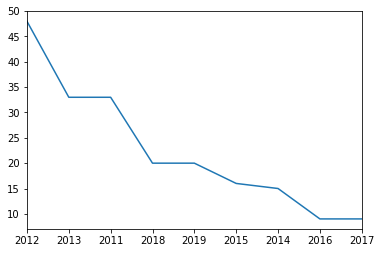

In [202]:
q1.year.value_counts().plot(); #2012,2013,2011년이 가장 많았다

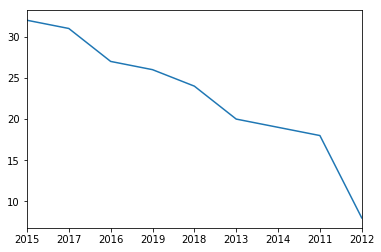

In [203]:
q5.year.value_counts().plot(); #2015,2016,2017년이 가장많았고 2011,2012년이 적었음

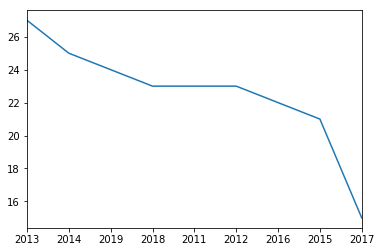

In [204]:
q2.year.value_counts().plot();

In [207]:
q1.cum_return.mean()

0.9550430491283586

In [208]:
q5.cum_return.mean()

3.784401942420488